In [1]:
from datetime import timedelta
import pandas

import swasputils

In [2]:
zoo_classifications = swasputils.ZooniverseClassifications()

In [3]:
SKIP_WORKFLOWS = {5214,17339,17444,17445}

In [4]:
workflow_counts = {}
for workflow_id, workflow_classifications in zoo_classifications.workflows.items():
    if workflow_id in SKIP_WORKFLOWS:
        continue
    classification_dates = workflow_classifications.df['created_at']
    if len(classification_dates.index) == 0:
        continue
    classification_dates = classification_dates.value_counts()
    classification_dates.index = pandas.to_datetime(classification_dates.index)
    classification_dates.name = workflow_id
    workflow_counts[workflow_id] = classification_dates.resample('1D').count()
workflow_counts = pandas.DataFrame(workflow_counts)

<AxesSubplot:title={'center':'Daily classifications (all-time)'}>

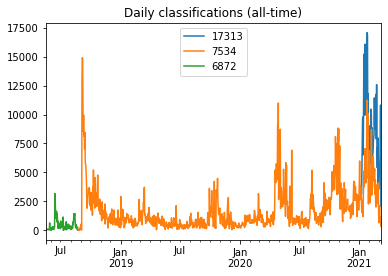

In [5]:
workflow_counts.dropna('columns', 'all').plot(
    title='Daily classifications (all-time)',
)

<AxesSubplot:title={'center':'Daily classifications (last year)'}>

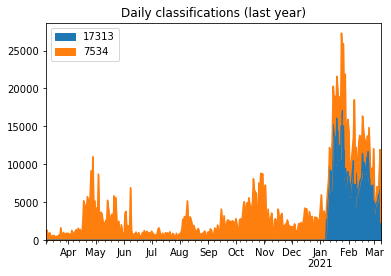

In [6]:
workflow_counts[
    workflow_counts.index >= (workflow_counts.index.max() - timedelta(days=365))
].dropna('columns', 'all').plot.area(
    title='Daily classifications (last year)',
)

<AxesSubplot:title={'center':'Daily classifications (last 60 days)'}>

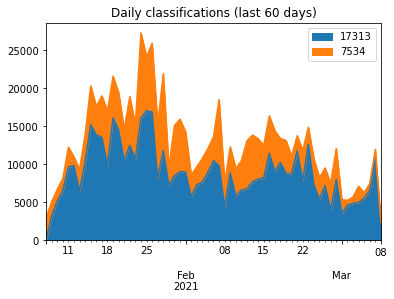

In [8]:
workflow_counts[
    workflow_counts.index >= (workflow_counts.index.max() - timedelta(days=60))
].dropna('columns', 'all').plot.area(
    title='Daily classifications (last 60 days)',
)